In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\monol\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("USA_Multiyear_Indicators.csv", index_col=0)
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
#df["GDP"] = df["GDP"].round(0).astype("int")
df.head()

,LOCATION,TIME,GDP,GDP_1,GDP_2,Unemployment,Unemployment_1,Unemployment_2,Confidence,Confidence_1,Confidence_2,Median_Income,Median_Income_1,Median_Income_2
0,USA,1992,3.522443,-0.108262,1.885960,7.508333,6.816667,5.616667,98.883736,98.929730,99.391740,53897,54318,55952
1,USA,1993,2.752852,3.522443,-0.108262,6.900000,7.508333,6.816667,99.561792,98.883736,98.929730,53610,53897,54318
2,USA,1994,4.028831,2.752852,3.522443,6.083333,6.900000,7.508333,100.623117,99.561792,98.883736,54233,53610,53897
3,USA,1995,2.684285,4.028831,2.752852,5.608333,6.083333,6.900000,100.611942,100.623117,99.561792,55931,54233,53610
4,USA,1996,3.772504,2.684285,4.028831,5.416667,5.608333,6.083333,100.787433,100.611942,100.623117,56744,55931,54233


# Select your features (columns)

In [40]:
# Set features. This will also be used as your x values.
#selected_features = df[['names', 'of', 'selected', 'features', 'here']]
#-#
df = df.head(1000)

selected_features1 = df.iloc[:,2:5]
selected_features2 = df.iloc[:,8:18]
selected_features = pd.merge(selected_features1, selected_features2, left_index=True, right_index=True)
selected_features.head()

,GDP,GDP_1,GDP_2,Confidence,Confidence_1,Confidence_2,Median_Income,Median_Income_1,Median_Income_2
0,3.522443,-0.108262,1.885960,98.883736,98.929730,99.391740,53897,54318,55952
1,2.752852,3.522443,-0.108262,99.561792,98.883736,98.929730,53610,53897,54318
2,4.028831,2.752852,3.522443,100.623117,99.561792,98.883736,54233,53610,53897
3,2.684285,4.028831,2.752852,100.611942,100.623117,99.561792,55931,54233,53610
4,3.772504,2.684285,4.028831,100.787433,100.611942,100.623117,56744,55931,54233


# Create a Train Test Split

Use `koi_disposition` for the y values

In [51]:
from sklearn.model_selection import train_test_split

X = selected_features.to_numpy()
y = df["Unemployment"].to_numpy().reshape(-1, 1)
#y = np.matmul(y,np.array([0,1,2])).reshape(-1, 1)
#y = df["koi_disposition"].values.reshape(-1, 1)
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

(26, 9) (26, 1)


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [52]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
y_scaler = MinMaxScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Train the Model



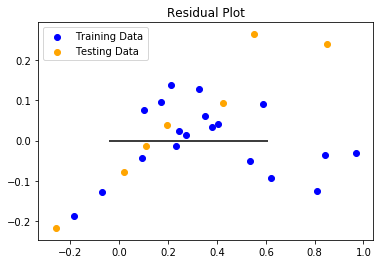

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [54]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: -11.752245535557245
Testing Data Score: -23.405962403296222


# Save the Model

In [55]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'gdp_model_rick.sav'
joblib.dump(model, filename)

['gdp_model_rick.sav']